In [18]:
import pandas as pd
import ast
import re
# Function to convert string to dictionary
def str_to_dict(s):
    return ast.literal_eval(s)

def preprocess_atom_features_string(s):
    # Replace 'np.float64(<number>)' with '<number>'
    s = re.sub(r"np\.float64\(([^)]+)\)", r"\1", s)
    return s

In [19]:
features_df = pd.read_csv('../data/descriptors/reaction_descriptors.csv')

In [20]:
# List of columns to process
atom_features_cols = [
    'reactant_0_atom_features',
    'reactant_1_atom_features',
    'product_0_atom_features',
    'product_1_atom_features'
]

# Apply the preprocessing function and then convert to dictionaries
for col in atom_features_cols:
    # Apply the preprocessing to remove 'np.float64'
    features_df[col] = features_df[col].apply(preprocess_atom_features_string)
    # Convert the string to a dictionary
    features_df[col] = features_df[col].apply(ast.literal_eval)

In [21]:
print(features_df['reactant_0_atom_features'].iloc[0])

{'atom_type_counts': {8: 2}, 'num_bonds_counts': {1: 2}, 'formal_charge_counts': {0: 2}, 'chirality_counts': {'unspecified': 2}, 'num_hydrogens_counts': {1: 2}, 'hybridization_counts': {'SP3': 2}, 'aromatic_atom_count': 0, 'average_atomic_mass': 0.15999}


In [7]:
def extract_atom_counts(atom_type_counts, elements):
    counts = {}
    for element, atomic_num in elements.items():
        counts[element] = atom_type_counts.get(atomic_num, 0)
    return counts

In [ ]:
elements = {
    'C': 6,
    'N': 7,
    'O': 8,
    # 'H': 1,
    'S': 16,
    'P': 15,
    'Cl': 17,
    'F': 9,
    'Br': 35,
    'I': 53,
}

In [22]:
# Assuming features_df is your DataFrame

# Function to extract counts and create new columns
def add_atom_counts(df, molecule_prefix, elements):
    atom_counts = df[f'{molecule_prefix}_atom_features'].apply(lambda x: extract_atom_counts(x['atom_type_counts'], elements))
    # Create new columns for each element
    for element in elements.keys():
        df[f'{molecule_prefix}_num_{element}'] = atom_counts.apply(lambda x: x[element])

# Apply the function to reactants and products
molecules = ['reactant_0', 'reactant_1', 'product_0', 'product_1']

for molecule in molecules:
    add_atom_counts(features_df, molecule, elements)

In [29]:
features_df.columns

Index(['unique_reaction_id', 'original_reaction_id', 'source',
       'reactant_0_fg_counts', 'reactant_0_num_atoms', 'reactant_0_num_bonds',
       'reactant_0_MolWt', 'reactant_0_NumHDonors', 'reactant_0_NumHAcceptors',
       'reactant_0_atom_features', 'reactant_0_bond_features',
       'reactant_1_fg_counts', 'reactant_1_num_atoms', 'reactant_1_num_bonds',
       'reactant_1_MolWt', 'reactant_1_NumHDonors', 'reactant_1_NumHAcceptors',
       'reactant_1_atom_features', 'reactant_1_bond_features',
       'product_0_num_atoms', 'product_0_num_bonds', 'product_0_MolWt',
       'product_0_NumHDonors', 'product_0_NumHAcceptors',
       'product_0_atom_features', 'product_0_bond_features',
       'product_1_num_atoms', 'product_1_num_bonds', 'product_1_MolWt',
       'product_1_NumHDonors', 'product_1_NumHAcceptors',
       'product_1_atom_features', 'product_1_bond_features',
       'reactant_0_num_C', 'reactant_0_num_N', 'reactant_0_num_O',
       'reactant_0_num_H', 'reactant_0_num_S

In [25]:
# Descriptive statistics for number of carbons
print("Reactant 0 - Number of Carbons:")
print(features_df['reactant_0_num_C'].describe())

print("\nReactant 1 - Number of Carbons:")
print(features_df['reactant_1_num_C'].describe())

Reactant 0 - Number of Carbons:
count    1867.000000
mean        2.566685
std         1.959183
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        12.000000
Name: reactant_0_num_C, dtype: float64

Reactant 1 - Number of Carbons:
count    1867.000000
mean        3.292983
std         2.210849
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: reactant_1_num_C, dtype: float64


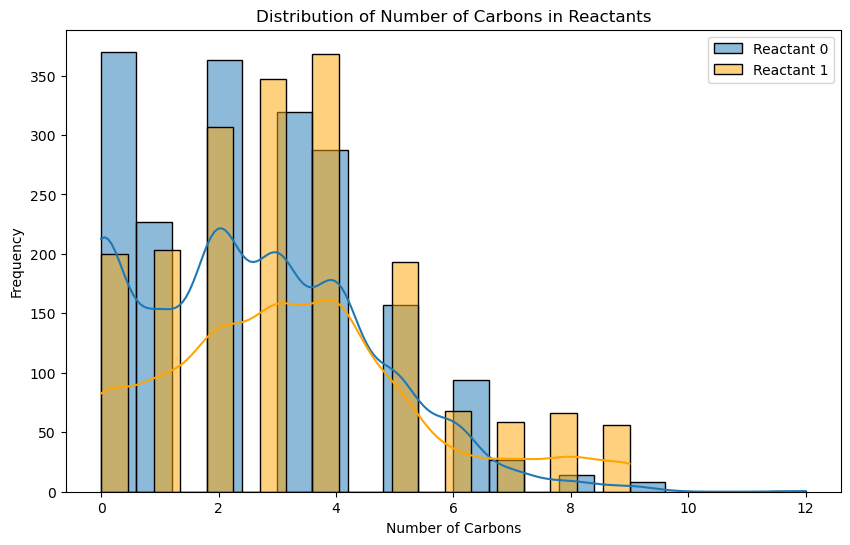

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(features_df['reactant_0_num_C'], bins=20, kde=True, label='Reactant 0')
sns.histplot(features_df['reactant_1_num_C'], bins=20, kde=True, color='orange', label='Reactant 1')
plt.title('Distribution of Number of Carbons in Reactants')
plt.xlabel('Number of Carbons')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [27]:
# For Reactant 0
corr_coef_r0 = features_df[['reactant_0_num_C', 'reactant_0_MolWt']].corr().iloc[0,1]
print(f"Correlation between number of carbons and molecular weight in Reactant 0: {corr_coef_r0:.2f}")

# For Reactant 1
corr_coef_r1 = features_df[['reactant_1_num_C', 'reactant_1_MolWt']].corr().iloc[0,1]
print(f"Correlation between number of carbons and molecular weight in Reactant 1: {corr_coef_r1:.2f}")

Correlation between number of carbons and molecular weight in Reactant 0: 0.76
Correlation between number of carbons and molecular weight in Reactant 1: 0.83


Difference in Number of Carbons (Reactant 0 - Reactant 1):
count    1867.000000
mean       -0.726299
std         2.634296
min        -9.000000
25%        -2.000000
50%        -1.000000
75%         1.000000
max        12.000000
Name: carbons_diff, dtype: float64


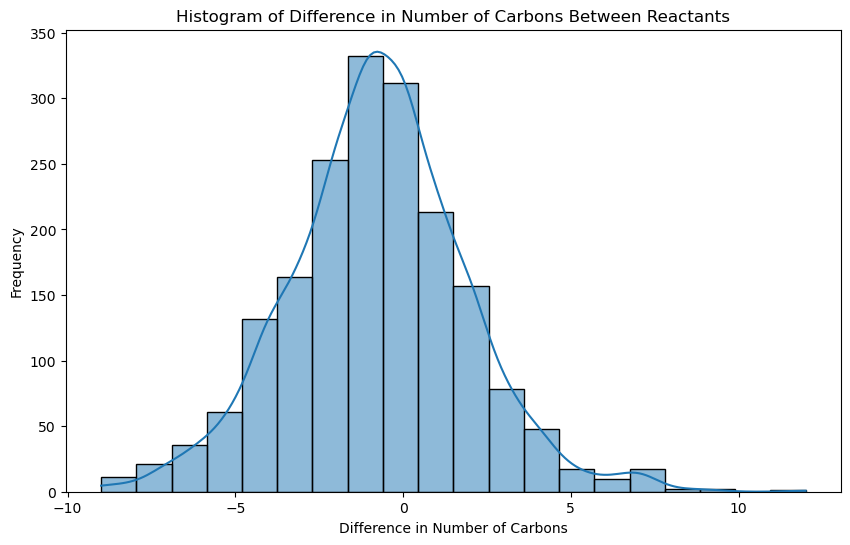

In [28]:
# Calculate the difference in number of carbons
features_df['carbons_diff'] = features_df['reactant_0_num_C'] - features_df['reactant_1_num_C']

# Descriptive statistics
print("Difference in Number of Carbons (Reactant 0 - Reactant 1):")
print(features_df['carbons_diff'].describe())

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(features_df['carbons_diff'], bins=20, kde=True)
plt.title('Histogram of Difference in Number of Carbons Between Reactants')
plt.xlabel('Difference in Number of Carbons')
plt.ylabel('Frequency')
plt.show()

In [43]:

# Initialize an empty list to store data
data = []

for element in elements.keys():
    count_r0 = features_df[f'reactant_0_num_{element}'].sum()
    count_r1 = features_df[f'reactant_1_num_{element}'].sum()
    data.append({'Element': element, 'Reactant 0': count_r0, 'Reactant 1': count_r1})

# Create a DataFrame
elements_df = pd.DataFrame(data)

In [47]:
elements_df['total'] = elements_df['Reactant 0'] + elements_df['Reactant 1']
elements_df

,Element,Reactant 0,Reactant 1,total
0,C,4792,6148,10940
1,N,451,186,637
2,O,584,621,1205
3,H,141,45,186
4,S,435,327,762
5,P,0,0,0
6,Cl,28,6,34
7,F,0,12,12
8,Br,0,6,6
9,I,0,0,0


In [45]:
# Melt the DataFrame
elements_melted = elements_df.melt(id_vars='Element', var_name='Reactant', value_name='Count')

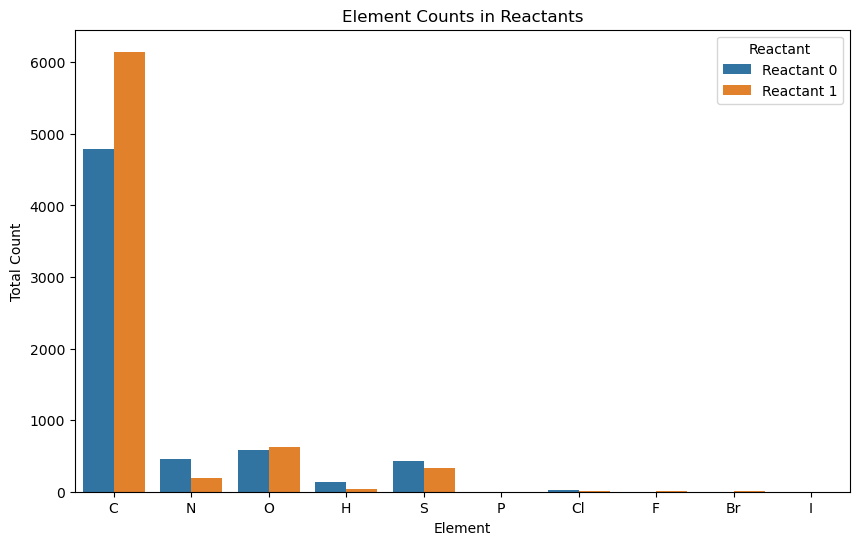

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=elements_melted, x='Element', y='Count', hue='Reactant')
plt.title('Element Counts in Reactants')
plt.xlabel('Element')
plt.ylabel('Total Count')
plt.legend(title='Reactant')
plt.show()

In [35]:
data = []

for element in elements.keys():
    mean_count_r0 = features_df[f'reactant_0_num_{element}'].mean()
    mean_count_r1 = features_df[f'reactant_1_num_{element}'].mean()
    data.append({'Element': element, 'Reactant 0': mean_count_r0, 'Reactant 1': mean_count_r1})

# Create a DataFrame
elements_mean_df = pd.DataFrame(data)

In [37]:
elements_mean_melted = elements_mean_df.melt(id_vars='Element', var_name='Reactant', value_name='Mean Count')

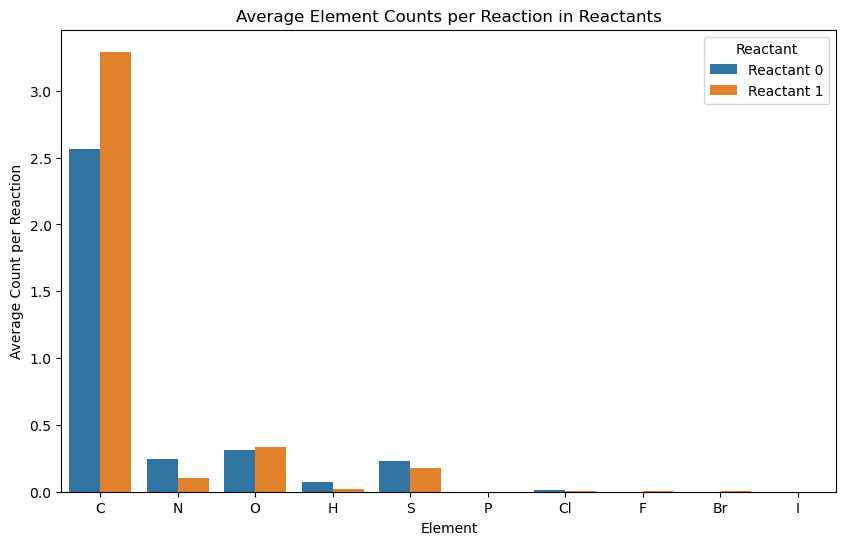

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(data=elements_mean_melted, x='Element', y='Mean Count', hue='Reactant')
plt.title('Average Element Counts per Reaction in Reactants')
plt.xlabel('Element')
plt.ylabel('Average Count per Reaction')
plt.legend(title='Reactant')
plt.show()

In [39]:
data = []

for element in elements.keys():
    counts = {
        'Element': element,
        'Reactant 0': features_df[f'reactant_0_num_{element}'].sum(),
        'Reactant 1': features_df[f'reactant_1_num_{element}'].sum(),
        'Product 0': features_df[f'product_0_num_{element}'].sum(),
        'Product 1': features_df[f'product_1_num_{element}'].sum(),
    }
    data.append(counts)

# Create a DataFrame
elements_all_df = pd.DataFrame(data)

# Melt the DataFrame
elements_all_melted = elements_all_df.melt(id_vars='Element', var_name='Molecule', value_name='Count')

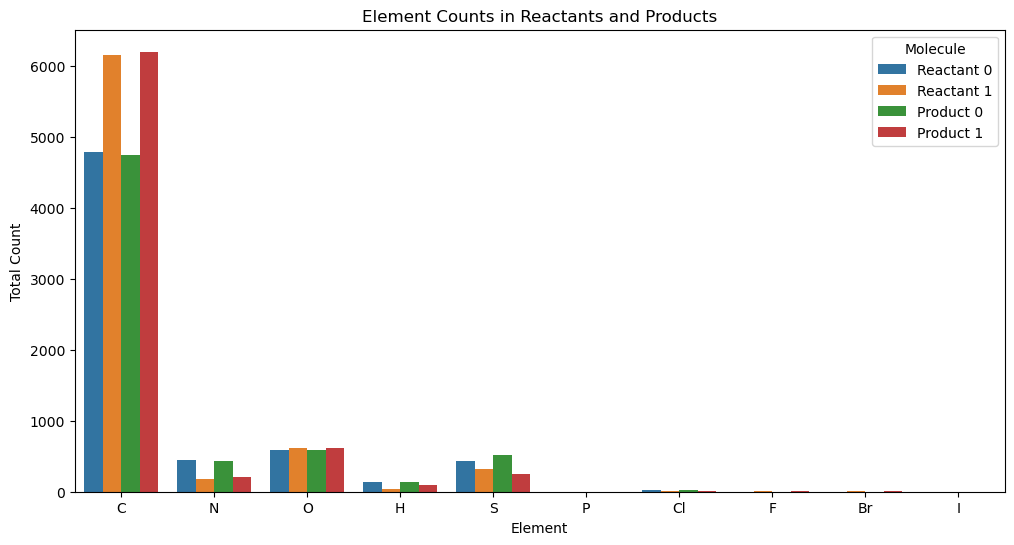

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(data=elements_all_melted, x='Element', y='Count', hue='Molecule')
plt.title('Element Counts in Reactants and Products')
plt.xlabel('Element')
plt.ylabel('Total Count')
plt.legend(title='Molecule')
plt.show()